<h3>Define functions</h3>

In [1]:
import random

#create instance of Kleinberg graph
def make_Kleinberg_Graph(n,m,p,alpha):
    kleinberg_Graph = {}
    #adding m nearest nodes in either direction as neighbours for each vertex
    for vertex in range(n):
        kleinberg_Graph[vertex] = []
        for neighbour in range(1,m+1):
            kleinberg_Graph[vertex].append((vertex-neighbour)%n)
            kleinberg_Graph[vertex].append((vertex+neighbour)%n)
    for vertex in range(n):
        for neighbour in range(1,m+1):
            #check rewiring probability for all clockwise neighbours of each vertex
            edge = (vertex+neighbour)%n
            prob = random.uniform(0,1)
            if prob <= p:
                distances = []
                nodes = []
                #create list of minimum distances from vertex to each other node to the power of -alpha
                for node in range(n):
                    if node > vertex:
                        distances.append(min(node-vertex,n-node+vertex)**-alpha)
                        nodes.append(node)
                    elif node < vertex:
                        distances.append(min(vertex-node,n-vertex+node)**-alpha)
                        nodes.append(node)
                #select new node from list using a random float and the list of values created above
                limit = sum(distances)
                selection = random.uniform(0,limit)
                total = 0
                for i in range(len(distances)):
                    total+=distances[i]
                    if total>selection:
                        w = nodes[i]
                        break
                #remove old edge and add new edge if new edge does not already exist
                if w not in kleinberg_Graph[vertex]:
                    kleinberg_Graph[vertex].remove(edge)
                    kleinberg_Graph[edge].remove(vertex)
                    kleinberg_Graph[vertex].append(w)
                    kleinberg_Graph[w].append(vertex)
    for vertex in range(n):
        kleinberg_Graph[vertex] = set(kleinberg_Graph[vertex])
    return kleinberg_Graph

In [11]:
#find search time of graph
def search_time(graph):
    num_vertices = len(graph.keys())
    pairs = []
    #take random sample of pairs of size n/2
    for i in range(round(num_vertices/2)):
        #choose random vertices
        v = random.randint(0,num_vertices-1)
        w = random.randint(0,num_vertices-1)
        #ensure they are not the same
        while v==w:
            w = random.randint(0,num_vertices-1)
        #ensure they have not already been chosen
        while [v,w] in pairs:
            v = random.randint(0,num_vertices-1)
            w = random.randint(0,num_vertices-1)
            while v==w:
                w = random.randint(0,num_vertices-1)
        pairs.append([v,w])
    total_steps = 0
    #calculate search time for each pair
    for [v,w] in pairs:
        current_node = v
        steps = 0
        #find edge closest to w until w reached
        while current_node!=w:
            edges = list(graph[current_node])
            min_dist = abs(w-v)
            min_edge = w
            for edge in edges:
                #check in both directions for closest edge
                clockwise = abs(w-edge)
                anticlockwise = min(w,edge)+num_vertices-max(w,edge)
                smallest = min(clockwise,anticlockwise)
                if smallest<min_dist:
                    min_dist = smallest
                    min_edge = edge
            #increment step counter and update current node
            steps+=1
            current_node = min_edge
        total_steps+=steps
    #calculate approximate search time for graph
    time = round(total_steps/len(pairs),2)
    return time
        

<h3>Question 1</h3>

In [3]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

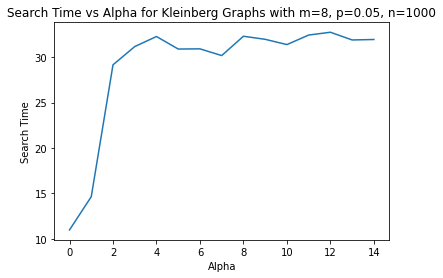

In [4]:
#set parameters
n=1000
m=8
p=0.05

alphas = []
step_counts = []

#calculate search time for each alpha value
for alpha in range(15):
    kleinberg_graph = make_Kleinberg_Graph(n,m,p,alpha)
    steps = search_time(kleinberg_graph)
    step_counts.append(steps)
    alphas.append(alpha)
    
#plot search time vs alpha 
plt.xlabel('Alpha')
plt.ylabel('Search Time')
plt.title('Search Time vs Alpha for Kleinberg Graphs with m=8, p=0.05, n=1000')

plt.plot(alphas, step_counts)

# Display a figure.
plt.show()

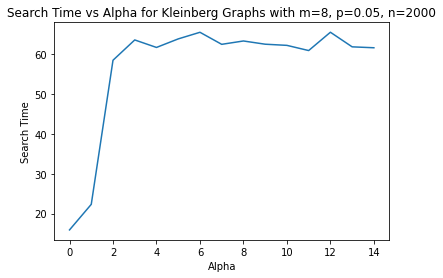

In [5]:
#set parameters
n=2000

alphas = []
step_counts = []

#calculate search time for each alpha value
for alpha in range(15):
    kleinberg_graph = make_Kleinberg_Graph(n,m,p,alpha)
    steps = search_time(kleinberg_graph)
    step_counts.append(steps)
    alphas.append(alpha)
    
#clears plot
plt.clf()

#plot search time vs alpha 
plt.xlabel('Alpha')
plt.ylabel('Search Time')
plt.title('Search Time vs Alpha for Kleinberg Graphs with m=8, p=0.05, n=2000')

plt.plot(alphas, step_counts)

# Display a figure.
plt.show()

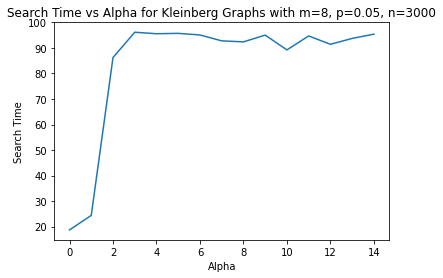

In [6]:
#set parameters
n=3000

alphas = []
step_counts = []

#calculate search time for each alpha value
for alpha in range(15):
    kleinberg_graph = make_Kleinberg_Graph(n,m,p,alpha)
    steps = search_time(kleinberg_graph)
    step_counts.append(steps)
    alphas.append(alpha)
    
#clears plot
plt.clf()

#plot search time vs alpha 
plt.xlabel('Alpha')
plt.ylabel('Search Time')
plt.title('Search Time vs Alpha for Kleinberg Graphs with m=8, p=0.05, n=3000')

plt.plot(alphas, step_counts)

# Display a figure.
plt.show()

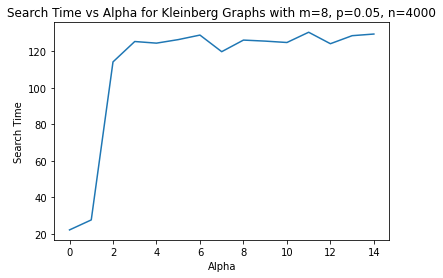

In [7]:
#set parameters
n=4000

alphas = []
step_counts = []

#calculate search time for each alpha value
for alpha in range(15):
    kleinberg_graph = make_Kleinberg_Graph(n,m,p,alpha)
    steps = search_time(kleinberg_graph)
    step_counts.append(steps)
    alphas.append(alpha)
    
#clears plot
plt.clf()

#plot search time vs alpha 
plt.xlabel('Alpha')
plt.ylabel('Search Time')
plt.title('Search Time vs Alpha for Kleinberg Graphs with m=8, p=0.05, n=4000')

plt.plot(alphas, step_counts)

# Display a figure.
plt.show()

<h3>Question 2</h3>

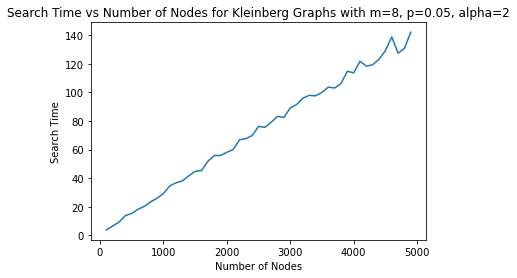

In [12]:
#set parameters
m=8
p=0.05
alpha=2

num_nodes = []
step_counts = []

#calculate search time for each number of nodes
for n in range(100,5000,100):
    kleinberg_graph = make_Kleinberg_Graph(n,m,p,alpha)
    steps = search_time(kleinberg_graph)
    step_counts.append(steps)
    num_nodes.append(n)
    
#clears plot
plt.clf()

#plot search time vs alpha 
plt.xlabel('Number of Nodes')
plt.ylabel('Search Time')
plt.title('Search Time vs Number of Nodes for Kleinberg Graphs with m=8, p=0.05, alpha=2')

plt.plot(num_nodes, step_counts)

# Display a figure.
plt.show()